In [1]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
from utils import *
from uci.uci_data import *

In [2]:
# Carga datos de dataset
uci_path='uci/raw_data'
df_np = np.loadtxt(uci_path+'/{}/data/data.txt'.format('housing'))
df_y = pd.DataFrame(df_np[:, -1:])
df_X = pd.DataFrame(df_np[:, :-1])

In [3]:
#Inspeccionamos los valores
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
#Tenemos 506 observaciones y 13 atributos
df_X.shape

(506, 13)

In [6]:
#Generamos el grafo. Definimos los parametros
node_mode=0
train_edge=0.7 #porcentaje de arcos que usamos para el entrenamiento
split_sample=0.
split_by='y'
train_y=0.7
seed=0
normalize=False
#Generamos grafo
data = get_data(df_X, df_y, node_mode, train_edge, split_sample, 
                    split_by, train_y, seed,normalize)

In [7]:
# data es de tipo Data importado de pytorch geometric.
print("Num. nodos: {}".format(data.num_nodes))
print("Num. arcos: {}".format(data.num_edges))
print("Num. atributos de nodo: {}".format(data.num_node_features))
print("Num. atributos de arco: {}".format(data.num_edge_features))

Num. nodos: 519
Num. arcos: 13156
Num. atributos de nodo: 13
Num. atributos de arco: 1


In [ ]:
# Tenemos Nodos =506 observaciones + 13 atributos = 519
# Tenemos Arcos =506 observaciones * 13 atributos *2 = 13156 (un arco en cada direccion)
# Tenemos etiquetas de arcos = 506 observaciones * 13 atributos = 6578 
# Tenemos un atributo de nodo por cada atributo del dataset original
# Cada arco tiene el valor del atributo de una determinada observacion.

In [8]:
# Exploramos la forma que tiene el objeto data
print([print(a,"--->",data[a].shape) for a in data.keys[0:16]])

x ---> torch.Size([519, 13])
edge_index ---> torch.Size([2, 13156])
edge_attr ---> torch.Size([13156, 1])
y ---> torch.Size([506])
train_y_mask ---> torch.Size([506])
test_y_mask ---> torch.Size([506])
train_edge_index ---> torch.Size([2, 9318])
train_edge_attr ---> torch.Size([9318, 1])
train_edge_mask ---> torch.Size([6578])
train_labels ---> torch.Size([4659])
test_edge_index ---> torch.Size([2, 3838])
test_edge_attr ---> torch.Size([3838, 1])
test_edge_mask ---> torch.Size([6578])
test_labels ---> torch.Size([1919])
df_X ---> (506, 13)
df_y ---> (506,)
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [9]:
#Imprimimos los arcos de la primera observacion
print(data['edge_index'].numpy()[0][0:13])
print(data['edge_index'].numpy()[1][0:13])

[0 0 0 0 0 0 0 0 0 0 0 0 0]
[506 507 508 509 510 511 512 513 514 515 516 517 518]


In [10]:
#Imprimimos los valores de los arcos de la primera observacion (vemos que coincide)
print(data['edge_attr'][0:13])

tensor([[6.3200e-03],
        [1.8000e+01],
        [2.3100e+00],
        [0.0000e+00],
        [5.3800e-01],
        [6.5750e+00],
        [6.5200e+01],
        [4.0900e+00],
        [1.0000e+00],
        [2.9600e+02],
        [1.5300e+01],
        [3.9690e+02],
        [4.9800e+00]])


In [11]:
# El valor de la primera observación
print(data['y'][0])

tensor(24.)


In [12]:
# Vemos el valor de los atributos de los nodos
print(data['x'].shape)
print(data['x'][505]) # Imprimimos el valor del ultimo nodo de tipo observacion
print(data['x'][506]) # Imprimimos el valor del primer nodo de tipo feature

torch.Size([519, 13])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [13]:
print("Numero muestras q entrenamos:{}".format(data['train_y_mask'].sum())) # Entrenamos el 70% de las muestras aprox.
#Revisamos la primera observacion
print(data['train_edge_index'][0][0:11])
print(data['train_edge_index'][1][0:11])
print(data['test_edge_index'][0][0:2])
print(data['test_edge_index'][1][0:2])
print(data['train_edge_attr'][0:13])
print(data['test_edge_attr'][0:2])
print(data['train_edge_mask'][0:13])
print(data['test_edge_mask'][0:13])

Numero muestras q entrenamos:346
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([506, 508, 509, 510, 511, 512, 514, 515, 516, 517, 518])
tensor([0, 0])
tensor([507, 513])
tensor([[6.3200e-03],
        [2.3100e+00],
        [0.0000e+00],
        [5.3800e-01],
        [6.5750e+00],
        [6.5200e+01],
        [1.0000e+00],
        [2.9600e+02],
        [1.5300e+01],
        [3.9690e+02],
        [4.9800e+00],
        [2.7310e-02],
        [0.0000e+00]])
tensor([[18.0000],
        [ 4.0900]])
tensor([ True, False,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True])
tensor([False,  True, False, False, False, False, False,  True, False, False,
        False, False, False])


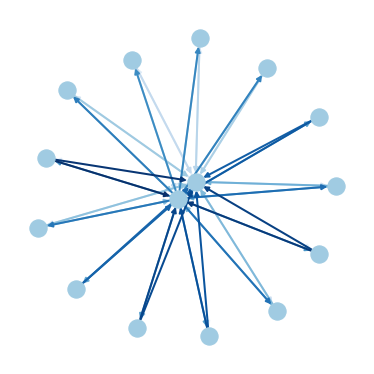

In [14]:
# Seleccionamos el grafo de las dos primeras observaciones y lo pintamos
datagraph=to_networkx(data)

H = datagraph.subgraph([0]+list(range(506,519))+[1])
#Pintar esto mas mono
import matplotlib.pyplot as plt
plt.figure(1,figsize=(5,5))
options = {
    "node_color": "#A0CBE2",
    "edge_color": range(52),
    "width": 2,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
pos = nx.spring_layout(H)
nx.draw(H,pos,**options)
plt.show()

## Vemos como se selecciona el conjunto de entrenamiento para los experimentos

In [15]:
known=0.7
device='cpu'
train_edge_attr=data.train_edge_attr.clone().detach().to(device)
known_mask = get_known_mask(known, int(train_edge_attr.shape[0] / 2)).to(device)

In [16]:
print(train_edge_attr.shape)
print(known_mask.shape)
print(known_mask.sum()) # Marcamos el 

torch.Size([9318, 1])
torch.Size([4659])
tensor(3248)


In [17]:
(519*13)*0.7

4722.9

In [18]:
from models.gnn_model import get_gnn
from models.prediction_model import MLPNet
from utils.utils import build_optimizer

class paso_parametros:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
parametros_modelo = {
    "model_types":'EGSAGE_EGSAGE_EGSAGE',
    "norm_embs":None,
    "post_hiddens":None,
    "node_dim": 64,
    "edge_dim":64,
    "edge_mode":1,
    "gnn_activation":'relu',
    "concat_states":False,
    "dropout":0.,
    "aggr":'mean'
}    
device='cpu'  
#Generamos el modelo
model = get_gnn(data, paso_parametros(**parametros_modelo)).to(device)

['EGSAGE', 'EGSAGE', 'EGSAGE'] [True, True, True] [64]


In [172]:
model

GNNStack(
  (convs): ModuleList(
    (0): EGraphSage(
      (message_lin): Linear(in_features=14, out_features=64, bias=True)
      (agg_lin): Linear(in_features=77, out_features=64, bias=True)
      (message_activation): ReLU()
      (update_activation): ReLU()
    )
    (1): EGraphSage(
      (message_lin): Linear(in_features=128, out_features=64, bias=True)
      (agg_lin): Linear(in_features=128, out_features=64, bias=True)
      (message_activation): ReLU()
      (update_activation): ReLU()
    )
    (2): EGraphSage(
      (message_lin): Linear(in_features=128, out_features=64, bias=True)
      (agg_lin): Linear(in_features=128, out_features=64, bias=True)
      (message_activation): ReLU()
      (update_activation): ReLU()
    )
  )
  (node_post_mlp): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.0, inplace=False)
    )
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (edge_